# Iris Data Set (Mini Project)
## The dataset contains 4 distinct attribute information. 
### Species mentioned are Iris-setosa,Iris-versicolor and Iris-virginica.




## Import Modules

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset

In [2]:
df = pd.read_csv('Iris (1).csv')
df.head()
df=df.drop(columns=['Id'])

In [3]:
#Overview statistic display
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
#Display data types present in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

## Preprocessing of Dataset

In [6]:
#Check for Null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Exploratory Data Analysis


<AxesSubplot:>

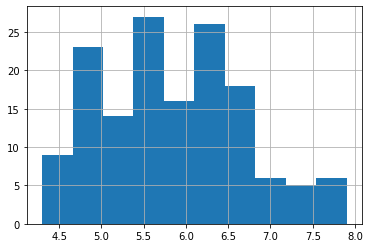

In [7]:
#Histogram Rep.
df['SepalLengthCm'].hist()

<AxesSubplot:>

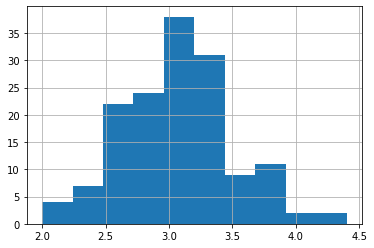

In [8]:
df['SepalWidthCm'].hist()

<AxesSubplot:>

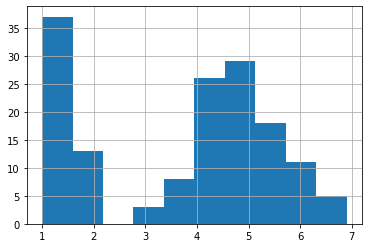

In [9]:
df['PetalLengthCm'].hist()

<AxesSubplot:>

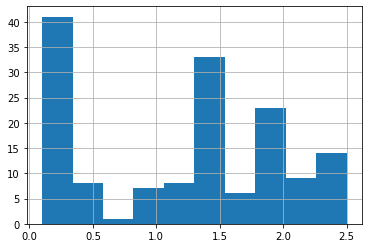

In [10]:
df['PetalWidthCm'].hist()

In [11]:
#Scatter Plot
colors =['red','green','blue']
species=['Iris-setosa','Iris-versicolor','Iris-virginica']

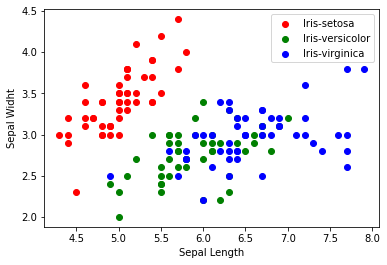

In [12]:
for i in range(3):
    x=df[df['Species']== species[i]]
    plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],c=colors[i],label=species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Widht')
plt.legend()

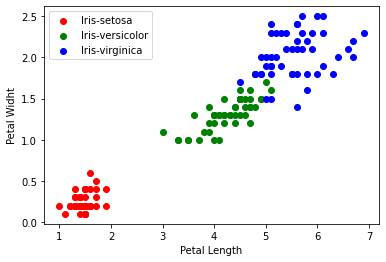

In [13]:
for i in range(3):
    x=df[df['Species']== species[i]]
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],c=colors[i],label=species[i])
plt.xlabel('Petal Length')
plt.ylabel('Petal Widht')
plt.legend()

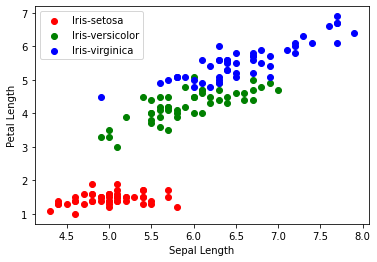

In [14]:
for i in range(3):
    x=df[df['Species']== species[i]]
    plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'],c=colors[i],label=species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()

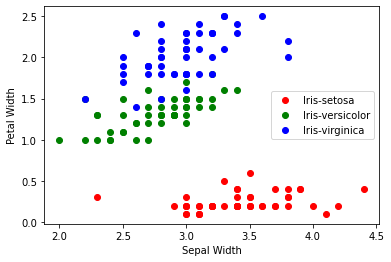

In [15]:
for i in range(3):
    x=df[df['Species']== species[i]]
    plt.scatter(x['SepalWidthCm'],x['PetalWidthCm'],c=colors[i],label=species[i])
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.legend()

### After visualizing through scatter plot we can select the attributes which can help distinguish between two species based on the distribution of data

In [16]:
#Petal Widht vs Petal Length appears to give the best distinction between different species.

## Correaltion Check

In [17]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

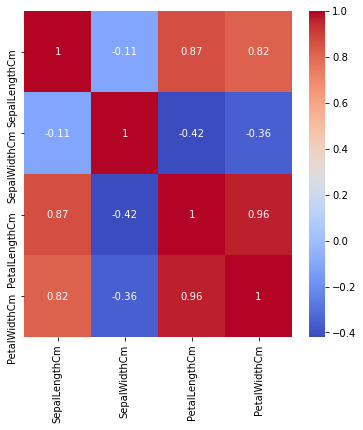

In [18]:
# Displaying correaltion in form of heat map
corr=df.corr()
fig,ax=plt.subplots(figsize=(6,6))
sns.heatmap(corr,annot=True,ax=ax,cmap='coolwarm')

In [19]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

In [20]:
df['Species']=le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Training Model

In [47]:
from sklearn.model_selection import train_test_split
X=df.drop(columns=['Species'])
Y=df['Species']
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.30)

In [48]:
#logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [49]:
#model training
model.fit(x_train,y_train)

C:\Users\arune\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
#print metric to get performance
print("Accuracy: ",model.score(x_test,y_test)*100)

Accuracy:  95.55555555555556


In [51]:
#K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [52]:
#model training
model.fit(x_train,y_train)

KNeighborsClassifier()

In [53]:
#print metric to get performance
print("Accuracy: ",model.score(x_test,y_test)*100)

Accuracy:  97.77777777777777


In [54]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [55]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [56]:
#print metric to get performance
print("Accuracy: ",model.score(x_test,y_test)*100)

Accuracy:  91.11111111111111


## Model Training Train Test Split 80:20

In [57]:
from sklearn.model_selection import train_test_split
X=df.drop(columns=['Species'])
Y=df['Species']
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.20)

In [58]:
#logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [59]:
#model training
model.fit(x_train,y_train)

C:\Users\arune\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [60]:
#print metric to get performance
print("Accuracy: ",model.score(x_test,y_test)*100)

Accuracy:  100.0


In [61]:
#K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [62]:
#model training
model.fit(x_train,y_train)

KNeighborsClassifier()

In [63]:
#print metric to get performance
print("Accuracy: ",model.score(x_test,y_test)*100)

Accuracy:  100.0


In [64]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [65]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [66]:
#print metric to get performance
print("Accuracy: ",model.score(x_test,y_test)*100)

Accuracy:  96.66666666666667


## Logistic Regression:

### While the method’s name includes the term regression, it is really a classification technique designed to predict binary outcomes. True/False, Yes/No, Pass/Fail, or 1/0, for example.

### Independent Variables are assessed to predict the binary result where it can either be 1(True) or 0(False). The independent variable can be of either numeric type or have a category, but dependent variable is always categorical.

## K-Nearest Neighbor: 
### It is pattern recognition algorithm that is used to train data set to form clusters by identifying its closest data points by measuring the distance between points in a plot.

## Decision Tree Algorithm:
### It is the most appropriate algorithm which can be used to classify dataset. As it works like a flow chart which keeps differentiating from top to deepest root, where even similar items can be categorized based on difference in attribute making them fall under different categories that can separate them the tree trunk to branch to leaves, where they become more finitely similar. And when you visualize it, the top row acts as root of the tree hence the name Decision Tree. 

